# Accounting for Seasonality

#### Loading Data

In [49]:
# Numerical Computing
import numpy as np
# Data Manipulation
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Statistical Modeling
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller

# Iterators Optimizer
from tqdm.notebook import tqdm
from itertools import product
from typing import Union

# Warnings
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

#### Loading Data

In [4]:
df = pd.read_csv('/Users/isisromero/desktop/time_series/data/air-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


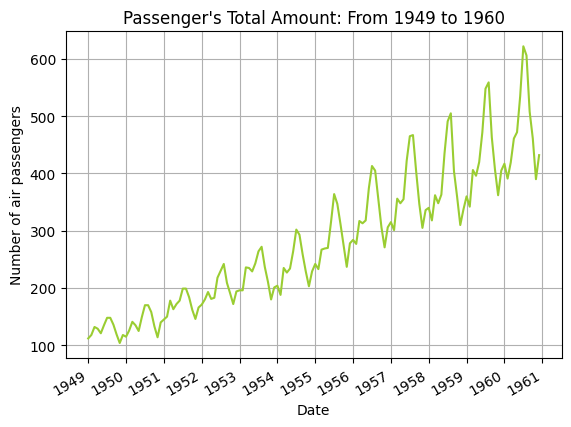

In [7]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'], color='yellowgreen')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.grid(True)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.title("Passenger's Total Amount: From 1949 to 1960")
plt.show()

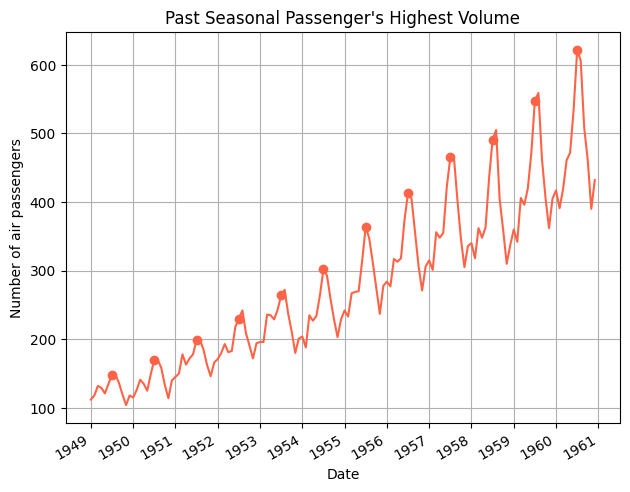

In [13]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'], color='tomato', markevery=np.arange(6, 145, 12), marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.grid(True)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()
plt.title("Past Seasonal Passenger's Highest Volume")
plt.show()

#### Identifying Seasonal Patterns in a Time Series

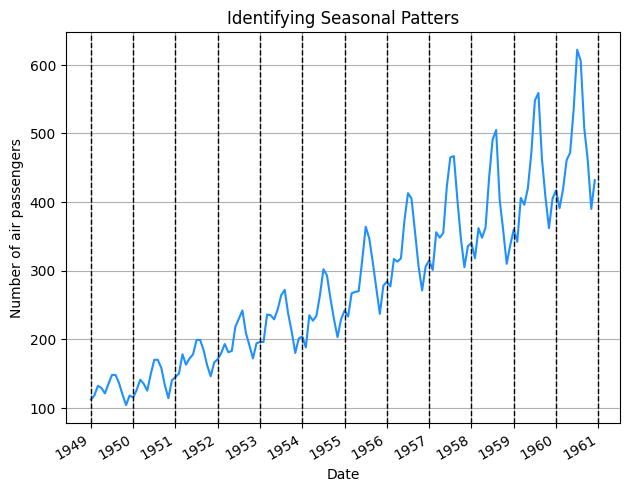

In [15]:
# Plotting in order to identify seasonal patterns
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'], color='dodgerblue')
for i in np.arange(0, 145, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.grid(True)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()
plt.title("Identifying Seasonal Patters")
plt.show()

##### Using The STL Function

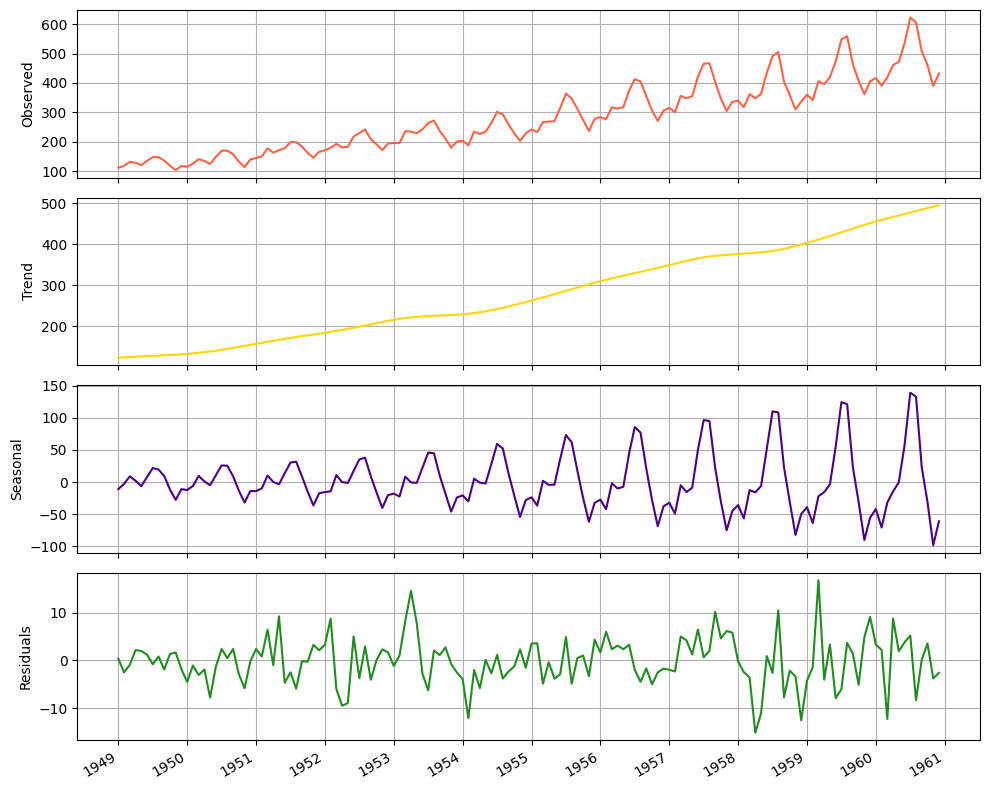

In [23]:
decomposition = STL(df['Passengers'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed, color='tomato')
ax1.set_ylabel('Observed')
ax1.grid(True)

ax2.plot(decomposition.trend, color='gold')
ax2.set_ylabel('Trend')
ax2.grid(True)

ax3.plot(decomposition.seasonal, color='indigo')
ax3.set_ylabel('Seasonal')
ax3.grid(True)

ax4.plot(decomposition.resid, color='forestgreen')
ax4.set_ylabel('Residuals')
ax4.grid(True)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

##### A Time Series with no seasonal behaviour will look like this:

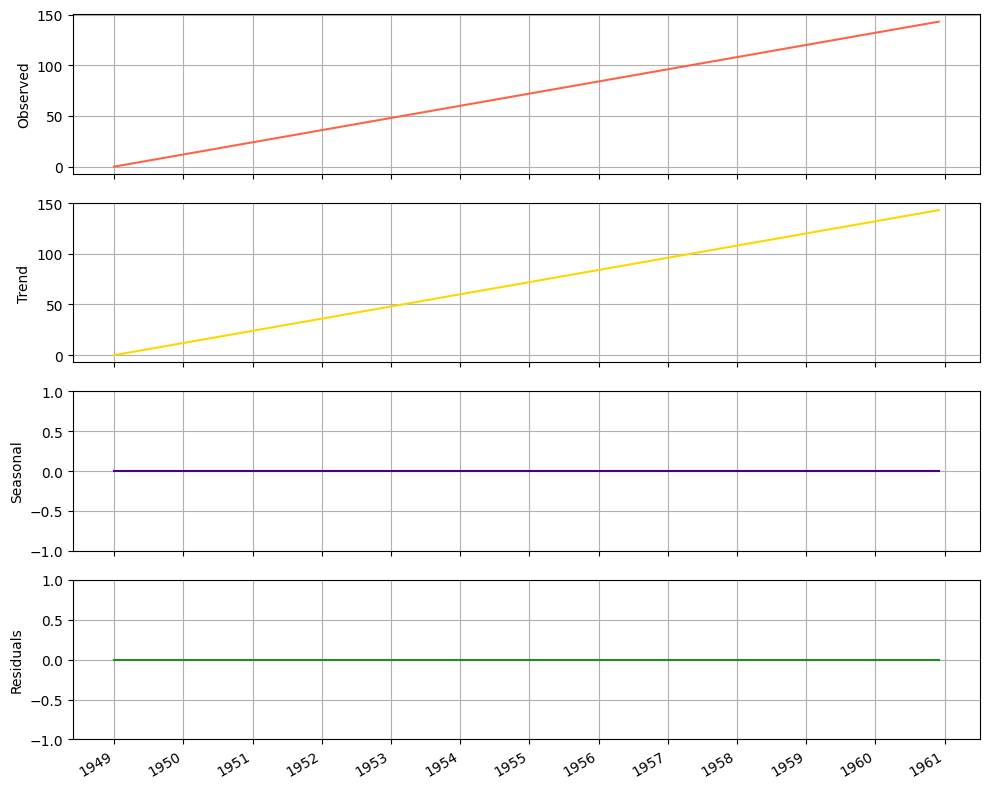

In [25]:
linear_ts = np.arange(0, 144, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed, color='tomato')
ax1.set_ylabel('Observed')
ax1.grid(True)

ax2.plot(decomposition.trend, color='gold')
ax2.set_ylabel('Trend')
ax2.grid(True)

ax3.plot(decomposition.seasonal, color='indigo')
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)
ax3.grid(True)

ax4.plot(decomposition.resid, color='forestgreen')
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)
ax4.grid(True)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

### Forecasting Monthly Air Passengers Number

#### Forecasting with ARIMA (p,d,q) Model

In [26]:
ad_fuller_result = adfuller(df['Passengers'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060447
p-value: 0.9918802434376409


##### 1st Order Differencing

In [32]:
# Differencing Procedure
df_diff = np.diff(df['Passengers'], n=1)

# Applying Dickey-Fuller on Differencing 
ad_fuller_result = adfuller(df_diff)

# Outcomes
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.8292668241699794
p-value: 0.054213290283828236


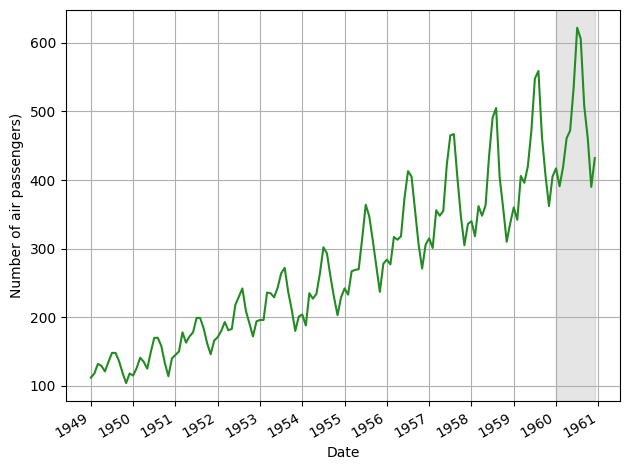

In [37]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'], color='forestgreen')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers)')
ax.axvspan(132, 143, color='#808080', alpha=0.2)
ax.grid(True)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

##### 2nd Order Differencing

In [38]:
# 2nd # Differencing Procedure
df_diff2 = np.diff(df_diff, n=1)

# Checking on Dickey-Fuller on Differencing 
ad_fuller_result = adfuller(df_diff2)

# Outcomes
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -16.38423154246855
p-value: 2.732891850013928e-29


In [44]:
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]

# Series Differentiation Stationary
d = 2
D = 0
# Equivalent Frequency (m) 
s = 12

In [45]:
# Generating all possible combinations
ARIMA_order_list = list(product(ps, qs, Ps, Qs))

##### Setting ARIMA (p,d,q) Function

In [50]:
def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

##### Setting Optimize SARIMA (p,d,q)(P,D,Q)m Function

In [51]:
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [53]:
# Train Set on Last 12 
train = df['Passengers'][:-12]

# Running out Optimized SARIMA Function
ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

  0%|          | 0/169 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(11, 3, 0, 0)",1016.838772
1,"(11, 4, 0, 0)",1019.018847
2,"(11, 5, 0, 0)",1020.377574
3,"(11, 1, 0, 0)",1021.028121
4,"(12, 0, 0, 0)",1021.231718
...,...,...
164,"(5, 0, 0, 0)",1281.732157
165,"(3, 0, 0, 0)",1300.282335
166,"(2, 0, 0, 0)",1302.913196
167,"(1, 0, 0, 0)",1308.152194


#### Performing Residual Analysis

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:              SARIMAX(11, 2, 3)   Log Likelihood                -493.419
Date:                Wed, 28 Feb 2024   AIC                           1016.839
Time:                        11:27:28   BIC                           1059.852
Sample:                             0   HQIC                          1034.316
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8239      0.100     -8.217      0.000      -1.020      -0.627
ar.L2         -0.9630      0.049    -19.750      0.000      -1.059      -0.867
ar.L3         -0.8520      0.087     -9.749      0.0

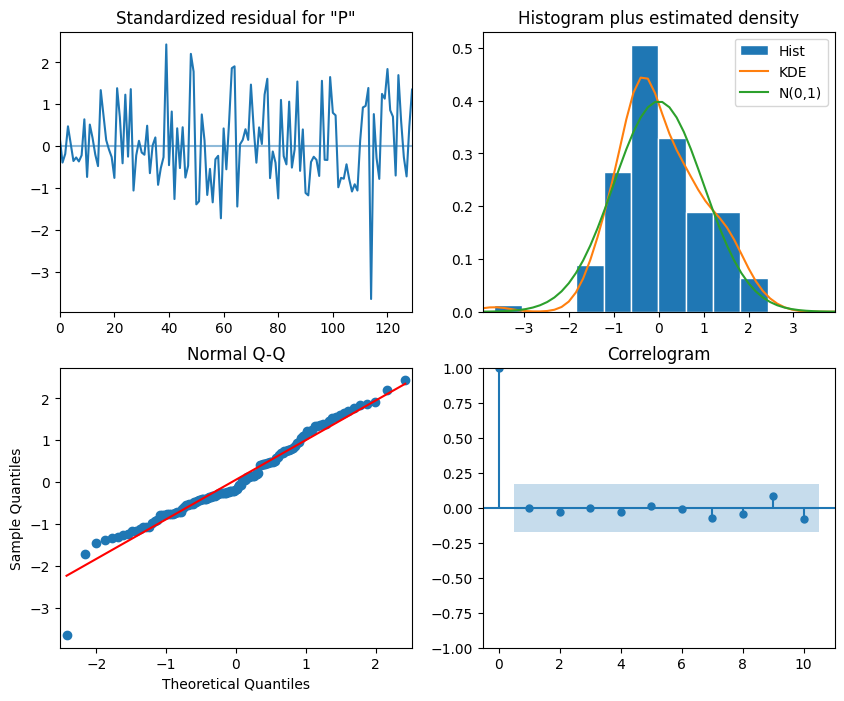

In [58]:
ARIMA_model = SARIMAX(train, order=(11,2,3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

# ARIMA Model Summary
print(ARIMA_model_fit.summary())

# ARIMA Diagnose
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

#### Executing LJung-Box Test

In [59]:
# Running the Ljung-Box test on the residuals

residuals = ARIMA_model_fit.resid
results = acorr_ljungbox(residuals, lags=np.arange(1, 11, 1))

# Accessing the p-values from the results dictionary
pvalues = results['lb_pvalue']

print(pvalues)

1     0.010433
2     0.035316
3     0.072898
4     0.100818
5     0.135429
6     0.192098
7     0.219104
8     0.284298
9     0.371674
10    0.316962
Name: lb_pvalue, dtype: float64


##### Setting The Naïve Seasonal Baseline Model

In [60]:
test = df.iloc[-12:]

test['naive_seasonal'] = df['Passengers'].iloc[120:132].values
test

,Month,Passengers,naive_seasonal
132,1960-01,417,360
133,1960-02,391,342
134,1960-03,419,406
135,1960-04,461,396
136,1960-05,472,420
137,1960-06,535,472
138,1960-07,622,548
139,1960-08,606,559
140,1960-09,508,463
141,1960-10,461,407


In [62]:
# Appending Model Predictions
ARIMA_pred = ARIMA_model_fit.get_prediction(132, 143).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Month,Passengers,naive_seasonal,ARIMA_pred
132,1960-01,417,360,422.368712
133,1960-02,391,342,410.637667
134,1960-03,419,406,461.827488
135,1960-04,461,396,457.827939
136,1960-05,472,420,481.698510
137,1960-06,535,472,531.108649
138,1960-07,622,548,606.151268
139,1960-08,606,559,615.479569
140,1960-09,508,463,525.628309
141,1960-10,461,407,467.123847


#### Forecasting with SARIMA (p,d,q)(P,D,Q)m Model

In [63]:
ad_fuller_result = adfuller(df['Passengers'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-vale: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060447
p-vale: 0.9918802434376409


In [64]:
# Differencing Procedure
df_diff = np.diff(df['Passengers'], n=1)

# Applying Dickey-Fuller on Differencing 
ad_fuller_result = adfuller(df_diff)

# Outcomes
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.8292668241699794
p-value: 0.054213290283828236


In [65]:
# Differencing Procedure on 12 Seasonal Difference
df_diff_seasonal_diff = np.diff(df_diff, n=12)

# Applying Dickey-Fuller on Differencing 
ad_fuller_result = adfuller(df_diff_seasonal_diff)

# Outcomes
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -17.624862360126443
p-value: 3.8230468561461995e-30


In [66]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

In [67]:
# Series Differentiation Stationary
d = 1
D = 1
# Equivalent Frequency (m) 
s = 12

In [68]:
# Generating all possible combinations
SARIMA_order_list = list(product(ps, qs, Ps, Qs))

In [69]:
# Train Set on Last 12 
train = df['Passengers'][:-12]

# Running out Optimized SARIMA Function
SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(2, 1, 1, 2)",892.232482
1,"(2, 1, 2, 1)",893.527182
2,"(2, 1, 1, 3)",894.093579
3,"(1, 0, 1, 2)",894.287516
4,"(0, 1, 1, 2)",894.987878
...,...,...
250,"(0, 0, 2, 0)",906.940147
251,"(3, 2, 0, 3)",907.181875
252,"(0, 0, 3, 2)",907.514319
253,"(0, 0, 3, 0)",908.742583


                                        SARIMAX Results                                        
Dep. Variable:                              Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -439.116
Date:                                 Wed, 28 Feb 2024   AIC                            892.232
Time:                                         11:54:02   BIC                            911.686
Sample:                                              0   HQIC                           900.132
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2665      0.085    -14.945      0.000      -1.433      -1

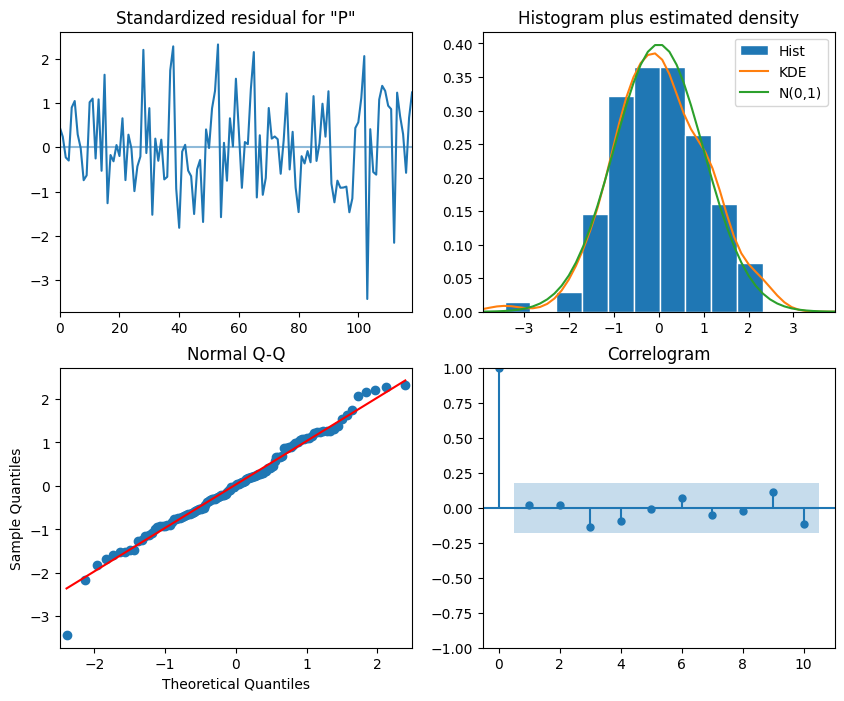

In [70]:
SARIMA_model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,2,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

# SARIMA Model Summary
print(SARIMA_model_fit.summary())

# SARIMA Diagnose
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

#### SARIMA LJung-Box Test

In [71]:
# Running the Ljung-Box test on the residuals

residuals = SARIMA_model_fit.resid
results = acorr_ljungbox(residuals, lags=np.arange(1, 11, 1))

# Accessing the p-values from the results dictionary
pvalues = results['lb_pvalue']

print(pvalues)

1     0.944347
2     0.688746
3     0.795712
4     0.873616
5     0.920280
6     0.944181
7     0.940781
8     0.950703
9     0.973843
10    0.893180
Name: lb_pvalue, dtype: float64


In [72]:
SARIMA_pred = SARIMA_model_fit.get_prediction(132, 143).predicted_mean

test['SARIMA_pred'] = SARIMA_pred
test

,Month,Passengers,naive_seasonal,ARIMA_pred,SARIMA_pred
132,1960-01,417,360,422.368712,418.513901
133,1960-02,391,342,410.637667,399.577187
134,1960-03,419,406,461.827488,461.313429
135,1960-04,461,396,457.827939,451.452634
136,1960-05,472,420,481.698510,473.744198
137,1960-06,535,472,531.108649,538.788480
138,1960-07,622,548,606.151268,612.440323
139,1960-08,606,559,615.479569,624.594874
140,1960-09,508,463,525.628309,520.173138
141,1960-10,461,407,467.123847,462.852995


### Model's Performance

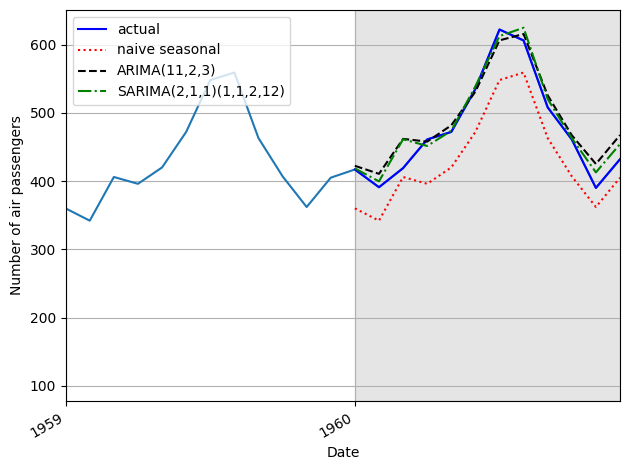

In [73]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
ax.plot(test['Passengers'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(11,2,3)')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA(2,1,1)(1,1,2,12)')

ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
ax.set_xlim(120, 143)

fig.autofmt_xdate()
plt.tight_layout()
plt.grid(True)

##### Mean Absolute Percentege Error Function

In [74]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [78]:
mape_naive_seasonal = mape(test['Passengers'], test['naive_seasonal'])
mape_ARIMA = mape(test['Passengers'], test['ARIMA_pred'])
mape_SARIMA = mape(test['Passengers'], test['SARIMA_pred'])

print(f'Mape Naïve Seasonal: {mape_naive_seasonal}')
print(f'MAPE ARIMA: {mape_ARIMA}')
print(f'MAPE SARIMA: {mape_SARIMA}')

Mape Naïve Seasonal: 9.987532920823485
MAPE ARIMA: 3.8410155255655063
MAPE SARIMA: 2.8487689091201363


#### MAPE Models Visualization

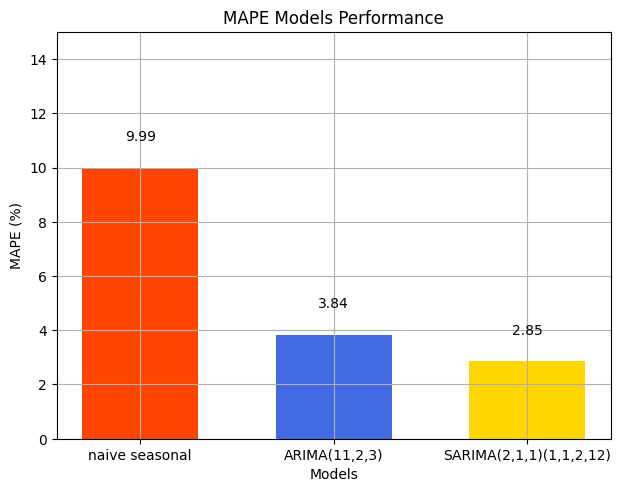

In [82]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(11,2,3)', 'SARIMA(2,1,1)(1,1,2,12)']
y = [mape_naive_seasonal, mape_ARIMA, mape_SARIMA]

ax.bar(x, y, width=0.6, color=['orangered', 'royalblue', 'gold'])
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)
ax.grid(True)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()
plt.title('MAPE Models Performance')
plt.show()